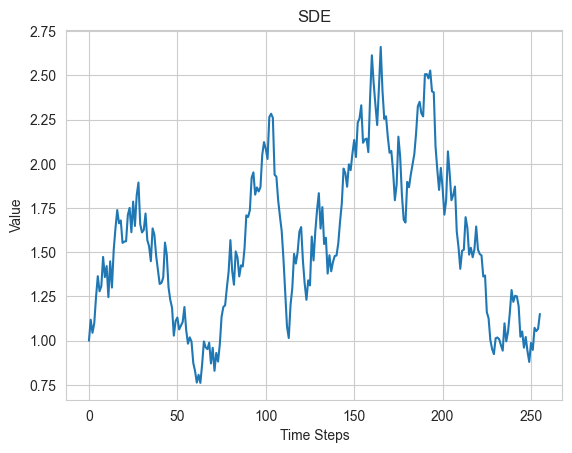

In [176]:
import numpy as np
import matplotlib.pyplot as plt

class StochasticModel:
    def __init__(self,time, dt,rfr):
        self.time = time
        self.dt = dt
        self.rfr= rfr #Risk Free Rate
    
    def simple_brownian_motion(self, s0, drift, volatility):
        sbm = [s0]
        ds = s0
        for _ in range(self.time):
            ds += drift * self.dt + volatility * np.random.randn()
            sbm.append(ds)
        return sbm
    
    def geometric_brownian_motion(self, s0, drift, volatility):
        gbm = [s0]
        ds = s0
        for _ in range(self.time):
            ds += drift * self.dt * ds + ds * volatility * np.random.randn()
            gbm.append(ds)
        return gbm
    
    #Often used for interest rates that have a mean reverting tendency
    #gamma is the reversion rate and nu/gamma is the mean rate.
    def mean_reverting_random_walk(self, r, nu, gamma, volatility):
        mrrw= [r]
        dr=r
        for _ in range(self.time):
            dr+=(nu-gamma*dr)*self.dt+ dr**(1/2)*volatility*np.random.randn()
            mrrw.append(dr)
        return mrrw
    
# Instantiate the model
model = StochasticModel(time=255, dt=1, rfr=1)

#sbm = model.simple_brownian_motion(0, 0.01, 0.3)

#gbm = model.geometric_brownian_motion(1, 0.001, 0.009)

mrrw = model.mean_reverting_random_walk(1, 0.01, 0.01, 0.1)

# Plot the data
plt.plot(mrrw)
plt.title("SDE")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.show()
